In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
import tensorflow.keras
from keras.layers.core import dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
np.random.seed(7)
data=np.genfromtxt("c:/data/regression/x09.txt",skip_header=36)
data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

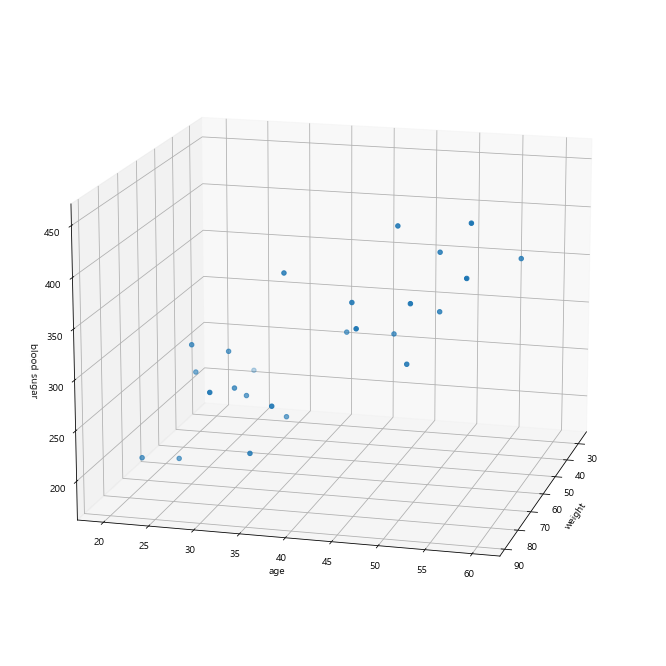

In [5]:
from mpl_toolkits.mplot3d import Axes3D

xdata=np.array(data[:,2],dtype=np.float32)
ydata=np.array(data[:,3],dtype=np.float32)
zdata=np.array(data[:,4],dtype=np.float32)
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15)
plt.show()

In [7]:
x_data=np.array(data[:,2:4],dtype=np.float32)
y_data=np.array(data[:,4],dtype=np.float32)
model=Sequential()
model.add(dense.Dense(1,input_shape=(2,)))
rmsprop=RMSprop(learning_rate=0.01)
model.compile(loss='mse', optimizer=rmsprop)

In [8]:
hist=model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 230ms/step - loss: 110785.2969
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 108497.2109
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 106860.8438
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 105504.6016
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 104310.8594
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 103225.0703
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 102216.8984
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 101267.5000
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 100364.2422
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 99498.2734
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 98663.0000
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 

In [9]:
print(hist.history.keys())

dict_keys(['loss'])


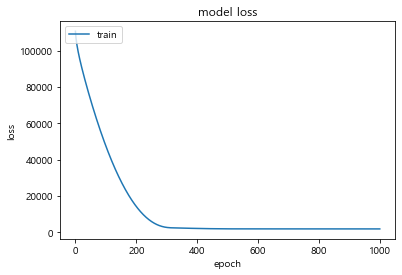

In [10]:
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel('epoch')
plt.legend(["train"],loc="upper left")
plt.show()

In [11]:
model.predict(np.array([100,40]).reshape(1,2))

array([[351.9303]], dtype=float32)

In [12]:
model.predict(np.array([60,25]).reshape(1,2))

array([[220.4509]], dtype=float32)

In [13]:
w, b =model.get_weights()
w, b

(array([[1.2043622],
        [5.553661 ]], dtype=float32),
 array([9.347659], dtype=float32))

In [14]:
x=np.linspace(20,100,50).reshape(50,1)
y=np.linspace(10,70,50).reshape(50,1)
x2=np.concatenate((x,y),axis=1)
z=np.matmul(x2,w)+b

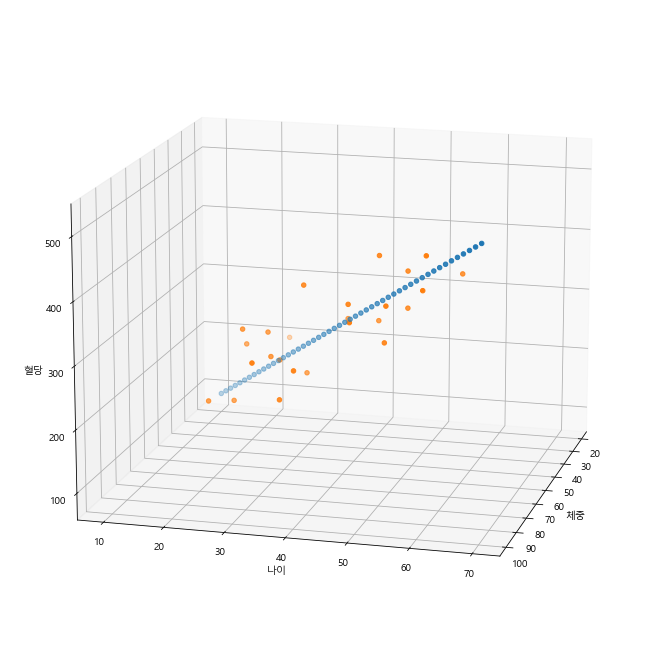

In [15]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z)
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("체중")
ax.set_ylabel("나이")
ax.set_zlabel("혈당")
ax.view_init(15,15)
plt.show()